In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score

In [3]:
df = pd.read_csv('/content/Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.shape

(400, 5)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [12]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['User ID','Purchased'],axis=1),df['Purchased'], test_size=0.2, random_state=2)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scalar = StandardScaler()

In [17]:
scalar.fit(X_train)
X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)


In [18]:
df.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


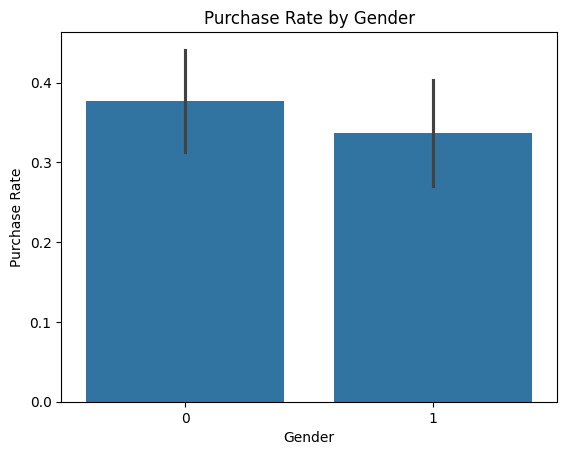

In [22]:
sns.barplot(x='Gender', y='Purchased', data=df)
plt.title('Purchase Rate by Gender')
plt.ylabel('Purchase Rate')
plt.show()

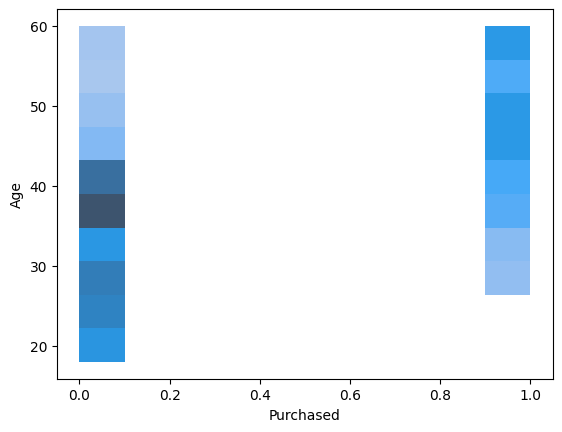

In [35]:
sns.histplot(data=df, x='Age', hue='Purchased')
plt.title('Age Distribution by Purchase Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

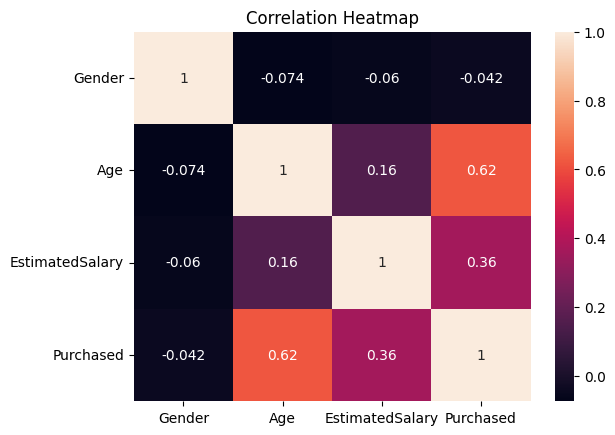

In [42]:
correlation_matrix = df[['Gender', 'Age', 'EstimatedSalary', 'Purchased']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [37]:
models = {
    "lg" : LogisticRegression(),
    "rf" : RandomForestClassifier(),
    "dt" : DecisionTreeClassifier(),
    "nb" : GaussianNB()
}

for name, algo in models.items():
  algo.fit(X_train, y_train)
  y_pred = algo.predict(X_test)
  print(name, accuracy_score(y_test,y_pred))

lg 0.8125
rf 0.875
dt 0.8375
nb 0.8375


In [38]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
accuracy_score(y_test,y_pred)

0.875

In [39]:
input_text = (-0.97530483, -1.04132394, -1.54376791)
input_np_text = np.asarray(input_text)
predicion = rfc.predict(input_np_text.reshape(1,-1))
if predicion == 1:
    print("purchased")
else:
    print("Not purchased")

Not purchased
